In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import f_oneway
import warnings
warnings.filterwarnings('ignore')

In [2]:
acd = pd.read_csv('datasets\\accident_data.csv')

In [3]:
acd

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,5/6/2019,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,2/7/2019,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,26-08-2019,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,NaN,Urban,NaN,Taxi/Private hire car
3,200701BS66128,Serious,16-08-2019,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,3/9/2019,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,NaN,Urban,NaN,Other vehicle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,18-02-2022,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car
660675,201091NM01881,Slight,21-02-2022,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660676,201091NM01935,Slight,23-02-2022,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660677,201091NM01964,Serious,23-02-2022,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc


In [4]:
acd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Index                    660679 non-null  object 
 1   Accident_Severity        660679 non-null  object 
 2   Accident Date            660679 non-null  object 
 3   Latitude                 660654 non-null  float64
 4   Light_Conditions         660679 non-null  object 
 5   District Area            660679 non-null  object 
 6   Longitude                660653 non-null  float64
 7   Number_of_Casualties     660679 non-null  int64  
 8   Number_of_Vehicles       660679 non-null  int64  
 9   Road_Surface_Conditions  659953 non-null  object 
 10  Road_Type                656159 non-null  object 
 11  Urban_or_Rural_Area      660664 non-null  object 
 12  Weather_Conditions       646551 non-null  object 
 13  Vehicle_Type             660679 non-null  object 
dtypes: f

In [5]:
acd['Latitude'] = acd['Latitude'].fillna(acd['Latitude'].mode()[0])
acd['Longitude'] = acd['Longitude'].fillna(acd['Longitude'].mode()[0])
acd['Road_Surface_Conditions'] = acd['Road_Surface_Conditions'].fillna('unknown road condition')
acd['Road_Type'] = acd['Road_Type'].fillna('unaccounted')
acd['Weather_Conditions'] = acd['Weather_Conditions'].fillna('unaccounted')
acd['Urban_or_Rural_Area'] = acd['Urban_or_Rural_Area'].fillna(acd['Urban_or_Rural_Area'].mode()[0])

In [6]:
acd.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
dtype: int64

In [7]:
acd['Accident Date'] = pd.to_datetime(acd['Accident Date'],dayfirst=True,errors='coerce')

In [8]:
acd.isnull().sum()

Index                           0
Accident_Severity               0
Accident Date              395672
Latitude                        0
Light_Conditions                0
District Area                   0
Longitude                       0
Number_of_Casualties            0
Number_of_Vehicles              0
Road_Surface_Conditions         0
Road_Type                       0
Urban_or_Rural_Area             0
Weather_Conditions              0
Vehicle_Type                    0
dtype: int64

In [9]:
acd['Accident_Severity'] = acd['Accident_Severity'].astype('category')
acd['Latitude'] = acd['Latitude'].astype('category')
acd['Light_Conditions'] = acd['Light_Conditions'].astype('category')
acd['District Area'] = acd['District Area'].astype('category')
acd['Longitude'] = acd['Longitude'].astype('category')
acd['Road_Surface_Conditions'] = acd['Road_Surface_Conditions'].astype('category')
acd['Road_Type'] = acd['Road_Type'].astype('category')
acd['Urban_or_Rural_Area'] = acd['Urban_or_Rural_Area'].astype('category')
acd['Weather_Conditions'] = acd['Weather_Conditions'].astype('category')
acd['Vehicle_Type'] = acd['Vehicle_Type'].astype('category')

In [10]:
acd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Index                    660679 non-null  object        
 1   Accident_Severity        660679 non-null  category      
 2   Accident Date            265007 non-null  datetime64[ns]
 3   Latitude                 660679 non-null  category      
 4   Light_Conditions         660679 non-null  category      
 5   District Area            660679 non-null  category      
 6   Longitude                660679 non-null  category      
 7   Number_of_Casualties     660679 non-null  int64         
 8   Number_of_Vehicles       660679 non-null  int64         
 9   Road_Surface_Conditions  660679 non-null  category      
 10  Road_Type                660679 non-null  category      
 11  Urban_or_Rural_Area      660679 non-null  category      
 12  Weather_Conditio

In [11]:
acd['Accident Date'] = acd['Accident Date'].astype('str')
acd.dtypes
acd['Accident Date'] = acd['Accident Date'].str.strip()
acd['Accident Date'] = acd['Accident Date'].str.replace('/','-')

In [12]:
print(type(acd['Accident Date']))

<class 'pandas.core.series.Series'>


In [13]:
acd['Accident Date'] = acd['Accident Date'].str.replace('/','-')

In [14]:
acd['Accident Date'] = pd.to_datetime(acd['Accident Date'],dayfirst=True,errors='coerce')


In [15]:
print(acd['Accident Date'].dtype)

datetime64[ns]


In [16]:
acd['Accident Date'].value_counts()

Accident Date
2021-11-02    685
2021-06-10    680
2019-06-12    678
2019-01-02    676
2021-04-12    667
             ... 
2022-09-01    236
2022-02-12    236
2022-05-04    231
2022-07-02    213
2022-10-01    123
Name: count, Length: 576, dtype: int64

In [17]:
acd['Year'] = acd['Accident Date'].dt.year
acd['Month'] = acd['Accident Date'].dt.month
acd['Day'] = acd['Accident Date'].dt.day
acd['DayOfWeek'] = acd['Accident Date'].dt.day_name()
acd['Hour'] = acd['Accident Date'].dt.hour
acd['Week'] = acd['Accident Date'].dt.isocalendar().week

In [18]:
monthly_accidents = acd.groupby('Month').size()
weekly_accidents = acd.groupby('DayOfWeek').size()
yearly_accidents = acd.groupby('Year').size()
hourly_accidents = acd.groupby('Hour').size()
daily_accidents = acd.groupby('Day').size()

In [19]:
correl = acd[['Year', 'Month', 'Day', 'Hour']].corr()

In [20]:
correl

,Year,Month,Day,Hour
Year,1.000000,-0.001695,0.011601,NaN
Month,-0.001695,1.000000,-0.005926,NaN
Day,0.011601,-0.005926,1.000000,NaN
Hour,NaN,NaN,NaN,NaN


In [21]:
df_2019 = acd[acd['Year'] == 2019]

<h1>Insight No. 1</h1>
<h2>Accidents Over Time</h2>

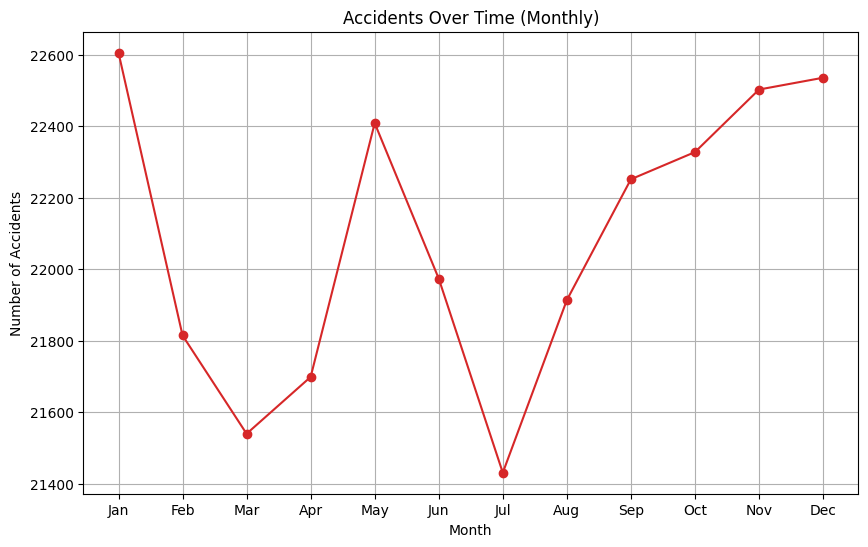

In [57]:

monthly_accidents = acd.groupby(acd['Accident Date'].dt.month).size()


plt.figure(figsize=(10, 6))
plt.plot(monthly_accidents.index, monthly_accidents.values, marker='o', linestyle='-', color='tab:red')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                                        'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.title('Accidents Over Time (Monthly)')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.grid(True)

plt.show()


<h1>Insight No. 2</h1>
<h2>Accident Severity Distribution</h2>

In [23]:
severity_counts = acd['Accident_Severity'].value_counts()
weekly_accidents = acd.groupby('DayOfWeek').size()
yearly_accidents = acd.groupby('Year').size()
hourly_accidents = acd.groupby('Hour').size()
daily_accidents = acd.groupby('Day').size()

<h1> Severity Counts</h1>

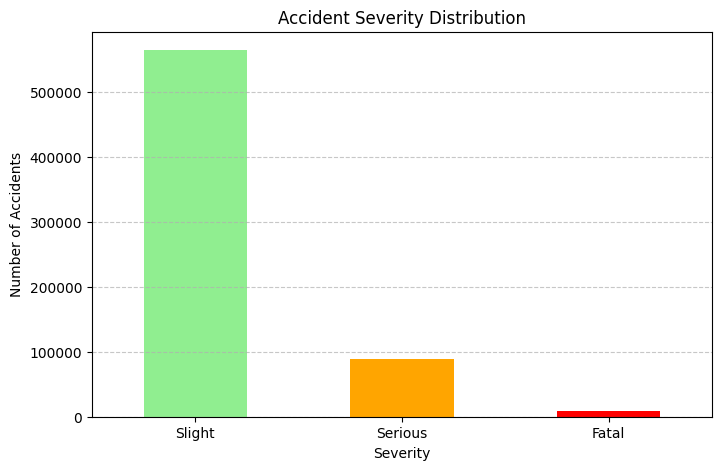

In [58]:
plt.figure(figsize=(8, 5))
severity_counts.plot(kind='bar', color=['lightgreen', 'orange', 'red'])
plt.title('Accident Severity Distribution')
plt.xlabel('Severity')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


<h1>Weekly Accident</h1>

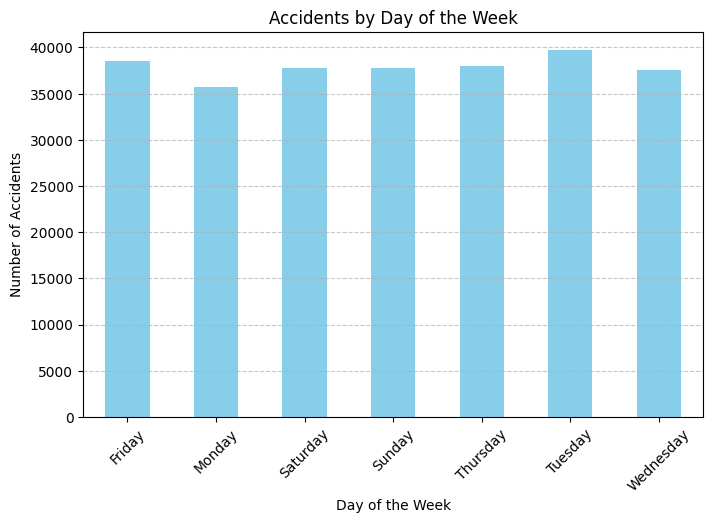

In [59]:
plt.figure(figsize=(8, 5))
weekly_accidents.plot(kind='bar', color='skyblue')
plt.title('Accidents by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


<h1>Yearly Accidents</h1>

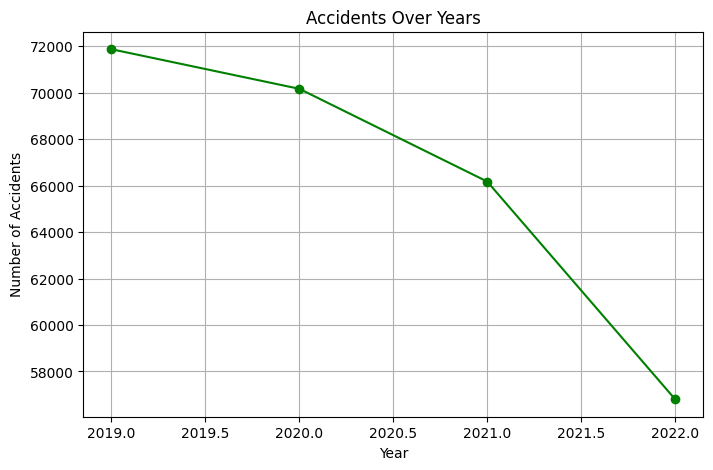

In [60]:
plt.figure(figsize=(8, 5))
plt.plot(yearly_accidents.index, yearly_accidents.values, marker='o', linestyle='-', color='green')
plt.title('Accidents Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.grid(True)

plt.show()


<h1>Hourly Accidents</h1>

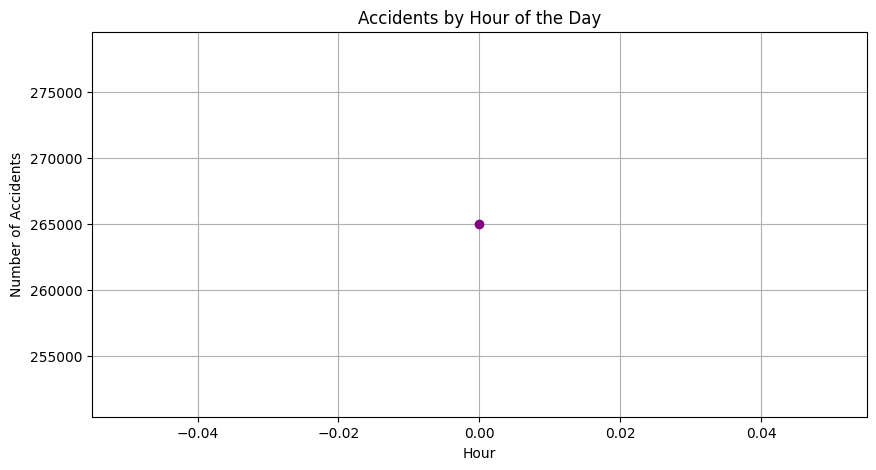

In [61]:
plt.figure(figsize=(10, 5))
plt.plot(hourly_accidents.index, hourly_accidents.values, marker='o', linestyle='-', color='purple')
plt.title('Accidents by Hour of the Day')
plt.xlabel('Hour')
plt.ylabel('Number of Accidents')
plt.grid(True)

plt.show()


<h1>Daily Accidents</h1>

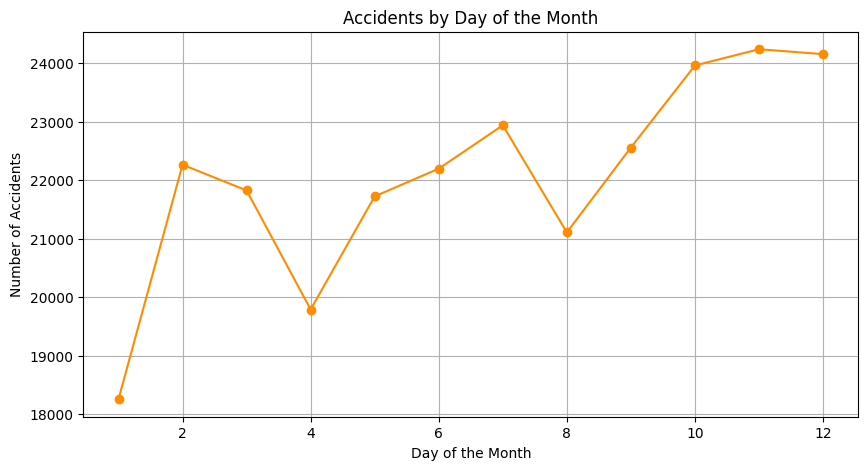

In [62]:
plt.figure(figsize=(10, 5))
plt.plot(daily_accidents.index, daily_accidents.values, marker='o', linestyle='-', color='darkorange')
plt.title('Accidents by Day of the Month')
plt.xlabel('Day of the Month')
plt.ylabel('Number of Accidents')
plt.grid(True)

plt.show()


<h1>Insight No. 3</h1>
<h2>Urban vs. Rural Accidents</h2>

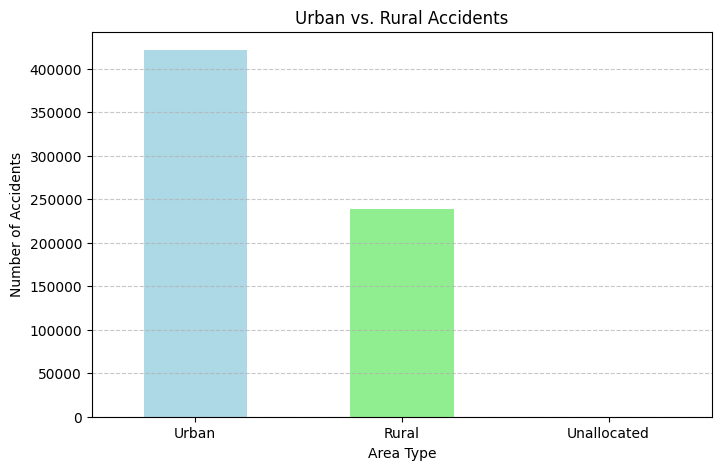

In [63]:
# urban_rural_counts = acd['Urban_or_Rural_Area'].value_counts()

plt.figure(figsize=(8, 5))
urban_rural_counts.plot(kind='bar', color=['lightblue', 'lightgreen', 'gray'])
plt.title('Urban vs. Rural Accidents')
plt.xlabel('Area Type')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


<h1>Insight No. 4</h1>
<h2>Impact of Weather Conditions</h2>

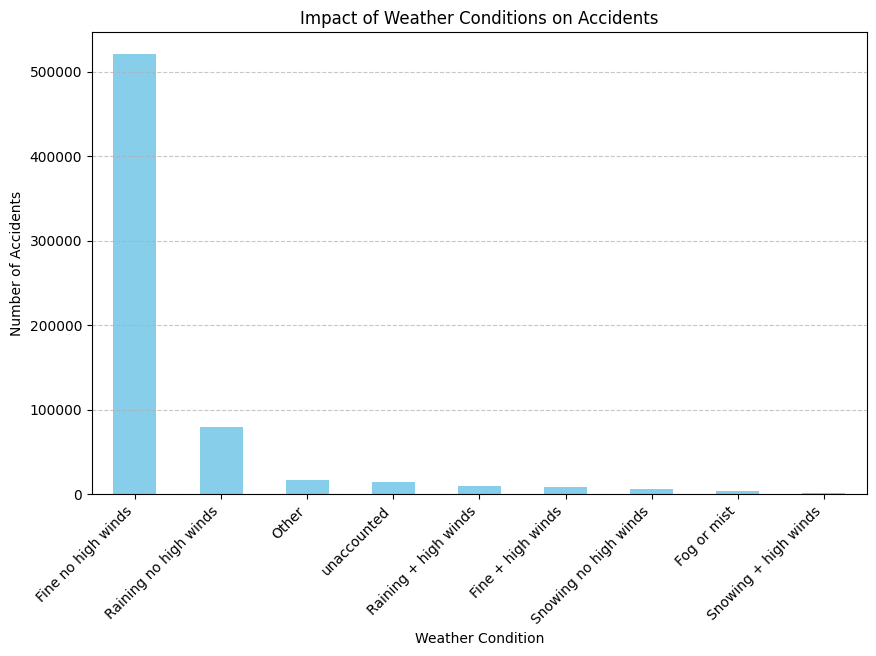

In [64]:
# acd['Weather_Conditions'].value_counts()

plt.figure(figsize=(10, 6))
acd['Weather_Conditions'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Impact of Weather Conditions on Accidents')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


<h1>Insight No. 5</h1>
<h2>Number of Vehicles vs. Severity</h2>

In [30]:
acd.groupby('Accident_Severity')['Number_of_Vehicles'].describe()

,count,mean,std,min,25%,50%,75%,max
Accident_Severity,,,,,,,,
Fatal,8661.0,1.786976,1.022719,1.0,1.0,2.0,2.0,28.0
Serious,88217.0,1.678327,0.751475,1.0,1.0,2.0,2.0,19.0
Slight,563801.0,1.855864,0.700571,1.0,1.0,2.0,2.0,32.0


<h1>Insight No. 6</h1>
<h2>Average Number of Vehicles Per Accident</h2>

In [31]:
acd.groupby('Accident_Severity')['Number_of_Vehicles'].mean()


Accident_Severity
Fatal      1.786976
Serious    1.678327
Slight     1.855864
Name: Number_of_Vehicles, dtype: float64

<h1>Insight No. 7</h1>
<h2>Light Conditions vs. Severity</h2>

In [32]:
acd.groupby(['Light_Conditions', 'Accident_Severity']).size().unstack()

Accident_Severity,Fatal,Serious,Slight
Light_Conditions,,,
Darkness - lighting unknown,68,794,5622
Darkness - lights lit,1860,19130,108345
Darkness - lights unlit,45,360,2138
Darkness - no lighting,1612,7174,28651
Daylight,5076,60759,419045


<h1>Insight No. 8</h1>
<h2> Road Surface Conditions Analysis</h2>

In [33]:
acd['Road_Surface_Conditions'].value_counts()

Road_Surface_Conditions
Dry                       447821
Wet or damp               186708
Frost or ice               18517
Snow                        5890
Flood over 3cm. deep        1017
unknown road condition       726
Name: count, dtype: int64

<h1>Insight No. 9</h1>
<h2>Urban vs. Rural Accidents</h2>

In [34]:
acd['Urban_or_Rural_Area'].value_counts()

Urban_or_Rural_Area
Urban          421678
Rural          238990
Unallocated        11
Name: count, dtype: int64

<h1>Insight No. 10</h1>
<h2>Most Common Accident Locations</h2>

In [35]:
acd['District Area'].value_counts()

District Area
Birmingham            13491
Leeds                  8898
Manchester             6720
Bradford               6212
Sheffield              5710
                      ...  
Berwick-upon-Tweed      153
Teesdale                142
Shetland Islands        133
Orkney Islands          117
Clackmannanshire         91
Name: count, Length: 422, dtype: int64

<h1>Insight No. 11</h1>
<h2>Average Number of Casualties per Accident</h2>

In [36]:
acd['Number_of_Casualties'].mean()

np.float64(1.357040257068864)

<h1>Insight No. 12</h1>
<h2>Most Common Vehicle Type Involved in Accidents</h2>

In [37]:
acd['Vehicle_Type'].value_counts()

Vehicle_Type
Car                                      497992
Van / Goods 3.5 tonnes mgw or under       34160
Bus or coach (17 or more pass seats)      25878
Motorcycle over 500cc                     25657
Goods 7.5 tonnes mgw and over             17307
Motorcycle 125cc and under                15269
Taxi/Private hire car                     13294
Motorcycle over 125cc and up to 500cc      7656
Motorcycle 50cc and under                  7603
Goods over 3.5t. and under 7.5t            6096
Other vehicle                              5637
Minibus (8 - 16 passenger seats)           1976
Agricultural vehicle                       1947
Pedal cycle                                 197
Data missing or out of range                  6
Ridden horse                                  4
Name: count, dtype: int64

<h1>Insight No. 13</h1>
<h2>Most Dangerous Road Types</h2>

In [38]:
acd['Road_Type'].value_counts()

Road_Type
Single carriageway    492143
Dual carriageway       99424
Roundabout             43992
One way street         13559
Slip road               7041
unaccounted             4520
Name: count, dtype: int64

<h1>Insight No. 14</h1>
<h2>Missing Data Overview</h2>

In [39]:
print("Missing Data Summary:")
acd.isnull().sum()

Missing Data Summary:


Index                           0
Accident_Severity               0
Accident Date              395672
Latitude                        0
Light_Conditions                0
District Area                   0
Longitude                       0
Number_of_Casualties            0
Number_of_Vehicles              0
Road_Surface_Conditions         0
Road_Type                       0
Urban_or_Rural_Area             0
Weather_Conditions              0
Vehicle_Type                    0
Year                       395672
Month                      395672
Day                        395672
DayOfWeek                  395672
Hour                       395672
Week                       395672
dtype: int64

<h1>Insight No. 15</h1>
<h2>Most Accident-Prone Days</h2>

In [40]:
acd['Accident Date'].value_counts()

Accident Date
2021-11-02    685
2021-06-10    680
2019-06-12    678
2019-01-02    676
2021-04-12    667
             ... 
2022-09-01    236
2022-02-12    236
2022-05-04    231
2022-07-02    213
2022-10-01    123
Name: count, Length: 576, dtype: int64

<h1>Insight No. 16</h1>
<h2>Highest Casualty Accidents</h2>

In [41]:
acd[['Accident Date', 'District Area', 'Number_of_Casualties']]

,Accident Date,District Area,Number_of_Casualties
0,2019-05-06,Kensington and Chelsea,1
1,2019-02-07,Kensington and Chelsea,1
2,NaT,Kensington and Chelsea,1
3,NaT,Kensington and Chelsea,1
4,2019-03-09,Kensington and Chelsea,1
...,...,...,...
660674,NaT,Highland,2
660675,NaT,Highland,1
660676,NaT,Highland,1
660677,NaT,Highland,1


<h1>Insight No. 17</h1>
<h2>Accidents per Year</h2>

In [42]:
acd['Year'].value_counts().sort_index()

Year
2019.0    71867
2020.0    70163
2021.0    66172
2022.0    56805
Name: count, dtype: int64

<h1>Insight No. 18</h1>
<h2>Accidents per Day of the Week</h2>

In [43]:
acd['DayOfWeek'].value_counts()

DayOfWeek
Tuesday      39701
Friday       38511
Thursday     38009
Sunday       37772
Saturday     37751
Wednesday    37548
Monday       35715
Name: count, dtype: int64

<h1>Insight No. 19</h1>
<h2>Accidents by Hour of the Day</h2>

In [44]:
acd['Hour'].value_counts()

Hour
0.0    265007
Name: count, dtype: int64

<h1>Insight No. 20</h1>
<h2>Most Accident-Prone Week</h2>

In [45]:
acd['DayOfWeek'].value_counts()

DayOfWeek
Tuesday      39701
Friday       38511
Thursday     38009
Sunday       37772
Saturday     37751
Wednesday    37548
Monday       35715
Name: count, dtype: int64

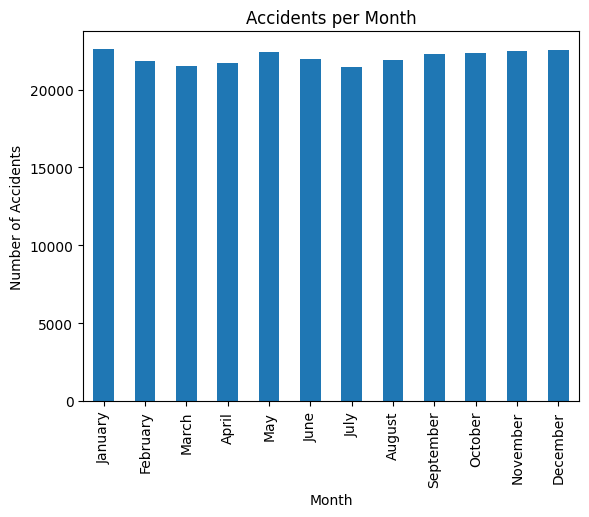

In [46]:
accidents_per_month = acd['Month'].value_counts().sort_index()

month_names = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
    7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

accidents_per_month.index = accidents_per_month.index.map(month_names)

accidents_per_month.plot(kind='bar')
plt.title('Accidents per Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.show()


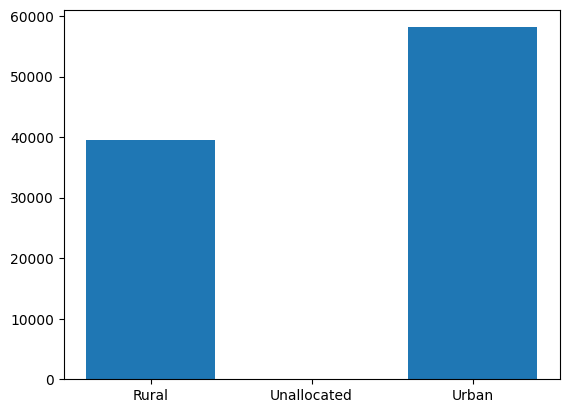

In [47]:
casualties_per_area = df_2019.groupby(['Urban_or_Rural_Area'])['Number_of_Casualties'].sum().reset_index()

casualties_per_area.columns = ['area','casualties']

y = casualties_per_area['area']
x = casualties_per_area['casualties']

plt.bar(y,x)
plt.show()

<h1>Seasonal Analysis</h1>

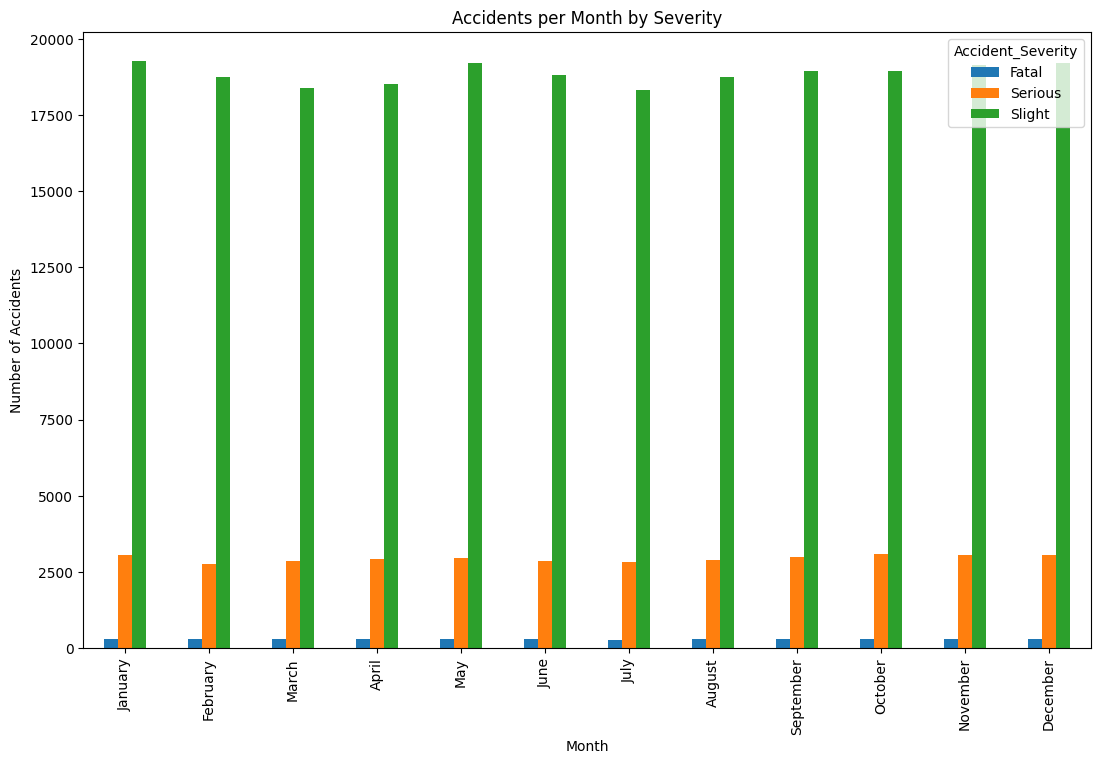

In [56]:
accidents_per_month_severity = acd.groupby(['Month', 'Accident_Severity']).size().unstack()

month_names = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
    7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

accidents_per_month_severity.index = accidents_per_month_severity.index.map(month_names)

accidents_per_month_severity.plot(kind='bar') 
plt.title('Accidents per Month by Severity')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.gcf().set_size_inches(13,8)
plt.show()
